In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import copy

from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook


def generate_data(n=1024):
    sep = 1
    x = torch.zeros(n // 2, 1).uniform_(0, 0.5)
    x = torch.cat((x, torch.zeros(n // 2, 1).uniform_(0.5 + sep, 1 + sep)), 0)
    # noise = torch.zeros(n, 1).normal_(0, 0.3)
    m = torch.distributions.Exponential(torch.tensor([3.0]))
    noise = m.rsample((n,))
    y = (2 * 3.1416 * x).sin() + noise  # ((2 - x.abs()) / 2).sqrt() * noise
    x_test = torch.linspace(-0.5, 2.5, 100).view(-1, 1)
    return x, y, x_test


def generate_data2(n=1024):
    f_c = 5
    A_m = 4
    A_c = 1
    f_m = 1
    modulation_index = 1

    x1 = np.linspace(0, 0.3, n // 3)#.reshape(-1, 1)
    x2 = np.linspace(0.5, 1, n // 3)#.reshape(-1, 1)
    x3 = np.linspace(0.4, 0.45, n // 100)#.reshape(-1, 1)
    x = np.concatenate((x1, x3, x2))

    carrier = np.cos(2 * np.pi * f_c * x) * A_c
    modulator = np.cos(2 * np.pi * f_m * x) * A_m
    signal = (
        A_c
        * np.cos(1 + modulation_index * (2 * np.pi * f_m * x))
        * np.cos(2 * np.pi * f_c * x)
    )
    # noise = torch.zeros(x.shape[0], 1).normal_(0, 0.3)
    noise = (1.8 * x) * np.random.normal(0, 0.2, x.shape[0])
    y = signal + noise
    x_test = np.linspace(-0.25, 1.25, 100)#.reshape(-1, 1)

    return x, y, x_test

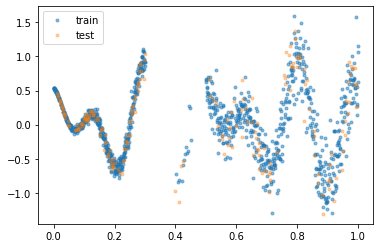

In [2]:
import random
seed = 1
random.seed(seed)
np.random.seed(seed)

n = 2000
x, y, test_x = generate_data2(2000)
x_tr, x_val, y_tr, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
x_val_c = np.copy(x_val)
x_val[np.random.rand(*x_val.shape) < .3] = np.nan
plt.plot(x_tr, y_tr, ".", alpha=0.5, label='train')
plt.plot(x_val, y_val, ".", alpha=0.35, label='test')
plt.legend()

In [6]:
def softplus_np(x): return np.log1p(np.exp(-np.abs(x))) + np.maximum(x, 0)

plt.plot(x_tr, y_tr, ".", alpha=0.5, label='train')
plt.plot(softplus_np(x_tr), softplus_np(y_tr), ".", alpha=0.5, label='train')

plt.legend()

NameError: name 'plt' is not defined

In [2]:
from darts.dataprocessing.transformers import Scaler
from darts.timeseries import TimeSeries
import numpy as np
import pandas as pd


from sklearn.preprocessing import StandardScaler
import sys
sys.path.append('../timeseries/')
sys.path.append('../src/')
#import timeseries_data


In [8]:
df = np.asarray(pd.read_csv(filepath_or_buffer='../../data/sunspots/monthly-sunspots.csv'))
x_al = df.copy().reshape(-1, 2)
x_al

array([['1749-01', 58.0],
       ['1749-02', 62.6],
       ['1749-03', 70.0],
       ...,
       ['1983-10', 55.8],
       ['1983-11', 33.3],
       ['1983-12', 33.4]], dtype=object)

In [ ]:
def softplus_list(x_):
    """
    Softplus positiviy mapping, used for transforming parameters.
    Loop over the elements of the paramter list so we can handle the special case
    where an element is empty
    """
    y_ = [np.log(1 + np.exp(-np.abs(x_[0]))) + np.maximum(x_[0], 0)]
    for i in range(1, len(x_)):
        if x_[i] is not []:
            y_ = y_ + [np.log(1 + np.exp(-np.abs(x_[i]))) + np.maximum(x_[i], 0)]
    return y_

softplus_list(x_al[:,1 ])

In [2]:
from exp_utils import load_sunspots_e2
x_tr, x_va, x_te, x_te_na, s_tr_x = load_sunspots_e2(ts=1, train_ratio=0.5)

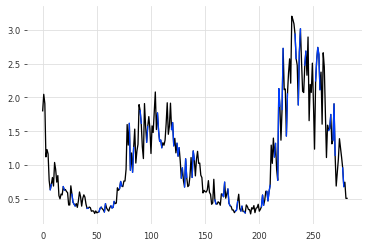

In [10]:
x_tr, x_va, x_te, x_te_na, s_tr_x = load_sunspots_e2(ts=0, train_ratio=0.5)
plt.plot(x_te[:, 1])
plt.plot(x_te_na[:, 1])

In [12]:
x_al[np.random.rand(*x_al.shape) < .2] = np.nan
np.random.rand(x_al.shape[0]) < .2

array([False, False, False, ...,  True, False, False])

In [4]:
from matplotlib import pyplot as plt
#x_tr.plot()
x_te.plot()
x_te_na.plot()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [17]:
import numpy as np
np.asarray(x_te_na.all_values)

array(<bound method TimeSeries.all_values of <TimeSeries (DataArray) (Month: 282, component: 1, sample: 1)>
array([[[1.80170653]],

       [[2.04530934]],

       [[1.90849514]],

       [[1.12056662]],

       [[1.22869699]],

       [[1.16445614]],

       [[0.77241595]],

       [[0.63545471]],

       [[0.71330481]],

       [[0.81657506]],

...

       [[0.88378193]],

       [[1.08824753]],

       [[1.38990368]],

       [[1.25324333]],

       [[1.1112799 ]],

       [[0.95716247]],

       [[0.68209102]],

       [[0.74669417]],

       [[0.50759196]],

       [[0.50850892]]])
Coordinates:
  * Month      (Month) datetime64[ns] NaT NaT ... 1983-11-01 1983-12-01
  * component  (component) object 'Sunspots'
Dimensions without coordinates: sample>, dtype=object)

In [11]:
help(x_tr)#.__dict__#_time_index._data.shape

Help on TimeSeries in module darts.timeseries object:

class TimeSeries(builtins.object)
 |  TimeSeries(xa: xarray.core.dataarray.DataArray)
 |  
 |  Methods defined here:
 |  
 |  __abs__(self)
 |  
 |  __add__(self, other)
 |  
 |  __contains__(self, ts: Union[int, pandas._libs.tslibs.timestamps.Timestamp]) -> bool
 |  
 |  __copy__(self, deep: bool = True)
 |  
 |  __deepcopy__(self)
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __ge__(self, other) -> xarray.core.dataarray.DataArray
 |      Return self>=value.
 |  
 |  __getitem__(self, key: Union[pandas.core.indexes.datetimes.DatetimeIndex, pandas.core.indexes.numeric.Int64Index, List[str], List[int], List[pandas._libs.tslibs.timestamps.Timestamp], str, int, pandas._libs.tslibs.timestamps.Timestamp, Any]) -> 'TimeSeries'
 |      Allow indexing on darts TimeSeries.
 |      
 |      The supported index types are the following base types as a single value, a list or a slice:
 |      - pd.Timestamp -> return a TimeS

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from darts.timeseries import TimeSeries
seed=1
df = np.asarray(pd.read_csv(filepath_or_buffer='../../data/sunspots/monthly-sunspots.csv'))

df_dim = 2
x_al = df.copy().reshape(-1, df_dim)
x_al[:, 1] = softplus_np(np.asarray(x_al[:, 1], dtype=np.float32))
# scale the whole dataset at once since we will remove points from the whole range
s_x = StandardScaler().fit(x_al[:, 1].reshape(-1, 1))
x_al[:, 1] = s_x.transform(x_al[:, 1].reshape(-1, 1)).reshape(-1)
    
x_tr, x_te, = train_test_split(x_al, test_size=0.1, random_state=seed)
x_tr, x_va = train_test_split(x_tr, test_size=0.1, random_state=seed)

x_tr_tmp = np.hstack([np.arange(x_tr.shape[0]).reshape(-1, 1), x_tr.reshape(-1, df_dim)])

df_tmp = pd.DataFrame(data = x_tr_tmp, index = ['t'], columns=['t','Month', 'Sunspots'])
df_tmp.set_index('t')
print(df_tmp.head())
ts_tr = TimeSeries.from_dataframe(df=x_tr_tmp, time_col='Month', freq='MS')
        

   t    Month  Sunspots
0  0  1919-07  0.308815
1  1  1811-09 -1.124429
2  2  1929-07  0.435522
3  3  1824-09 -0.709449
4  4  1963-11  -0.64264


ValueError: index must be monotonic for resampling

In [41]:
df = pd.read_csv(filepath_or_buffer='../../data/sunspots/monthly-sunspots.csv')
ts_df = TimeSeries.from_dataframe(df=df, 
                                      time_col='Month', 
                                      freq='MS')

x_tr_tmp = np.hstack([np.arange(x_tr.shape[0]).reshape(-1, 1), x_tr.reshape(-1, df_dim)])
df_tmp = pd.DataFrame(data = x_tr_tmp, columns=['t', 'Month', 'Sunspots'])

ts_tr = TimeSeries.from_dataframe(df=df_tmp, 
                                  time_col='Month', 
                                  freq='MS')

df_tmp

ValueError: index must be monotonic for resampling

In [43]:
df_tmp.index

RangeIndex(start=0, stop=2284, step=1)

In [44]:
df_tmp

,t,Month,Sunspots
0,0,1919-07,0.308815
1,1,1811-09,-1.124429
2,2,1929-07,0.435522
3,3,1824-09,-0.709449
4,4,1963-11,-0.64264
...,...,...,...
2279,2279,1831-12,-0.515933
2280,2280,1944-05,-1.122309
2281,2281,1787-07,1.767097
2282,2282,1835-12,0.603697


In [165]:

import sys
sys.path.append('../../timeseries/')
sys.path.append('../../src/')

import factors
import observation_models
import state_models
from ssm_em import StateSpaceEM

Dz = 8
Dx = 2
Du = 4
T = 4000

sm = state_models.LinearStateModel(Dz)
om = observation_models.LinearObservationModel(Dx, Dz)
#om.pca_init(x_tr.reshape(-1, 1))

(1081, 2)
Iteration 2 - llk=-1149.7
Iteration 4 - llk=-1068.5
Iteration 6 - llk=-1067.3
Iteration 8 - llk=-1066.6
Iteration 10 - llk=-1066.1
Iteration 12 - llk=-1065.7
Iteration 14 - llk=-1065.4
Iteration 16 - llk=-1065.1
Iteration 18 - llk=-1064.9
EM did converge.


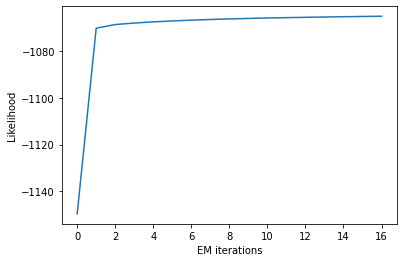

In [166]:
X = np.hstack([x_tr.reshape(-1, 1), y_tr.reshape(-1, 1)])
X_train = X[:1500]
X_test = X[1500:]
print(X_train.shape)
ssm_em_lin = StateSpaceEM(X_train, observation_model=om, state_model=sm)
ssm_em_lin.run()
plt.plot(ssm_em_lin.llk_list[1:])
plt.xlabel('EM iterations')
plt.ylabel('Likelihood')
plt.show()

<ipython-input-174-e8b8cf1e5e62>:6: RuntimeWarning: invalid value encountered in sqrt
  x_min = p_x.mu[:2000,ix] - 1.68 * np.sqrt(p_x.Sigma[:2000,ix,ix+1 ])
<ipython-input-174-e8b8cf1e5e62>:7: RuntimeWarning: invalid value encountered in sqrt
  x_max = p_x.mu[:2000,ix] + 1.68 * np.sqrt(p_x.Sigma[:2000,ix,ix+1])


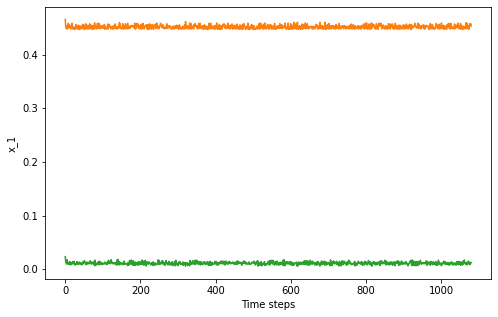

In [174]:
p_x = ssm_em_lin.compute_predictive_density(X_train)
mu = p_x.mu

plt.figure(figsize=(8,5))
ix=0
x_min = p_x.mu[:2000,ix] - 1.68 * np.sqrt(p_x.Sigma[:2000,ix,ix+1 ])
x_max = p_x.mu[:2000,ix] + 1.68 * np.sqrt(p_x.Sigma[:2000,ix,ix+1])
plt.plot(X_test[:2000,ix],X_test[:2000,ix+1], '.')
plt.plot(mu)
plt.fill_between(range(x_min.shape[0]), x_min, x_max, color='C1', alpha=.5, zorder=9)
plt.ylabel('x_%d' %(ix+1))
#plt.xlim([0,X[:2000].shape[0]])
plt.xlabel('Time steps')
plt.show()

(0.44, 0.465)

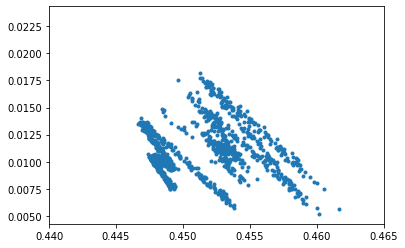

In [175]:
plt.plot(mu[:, 0], mu[:, 1], '.')
plt.xlim(0.44, 0.465)

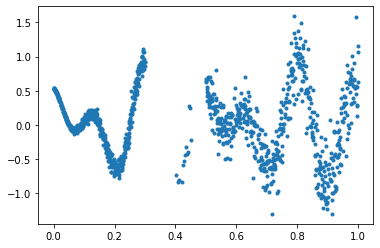

In [149]:
plt.plot(X_train[:, 0], X_train[:, 1], '.')